In [1]:
from data_loader import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
# about dataset:

# data is avalable here: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing 
# This dataset is public available for research. The details are described in 
# [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to 
# Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier,
# 62:22-31, June 2014



In [3]:
# IDEJE 
# 14 - previous: --> convertat u 0 ili 1 je li bilo poziva prije ili ne
# kad je 0 u previous onda je unkwon u outcome -> moze utjecat na vizualizaciju /korelaciju

# plot kategoricki po labelama triba normalizirat jer je previse zastupljen broj negativa + odredenih poslova
# pa se ni ne vidi ako je neka kategorija problematicna

In [4]:
dl = DataLoader("./config.json") # TODO load bank full later
inputs, labels = dl.load_csv_data() #  TODO load all
print("number of null elements:", inputs.isnull().values.sum())
inputs.head()


loading data from: /home/duje/Desktop/DOKTORSKI/predmeti-doktorski/otkrivanje_znanja/bank-marketing/data/bank.csv
number of null elements: 0


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [5]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
dtypes: int64(7), object(9)
memory usage: 565.2+ KB


In [6]:
numeric_columns = ['age', 'balance', 'day', 'campaign', 'duration', ]

all_columns = inputs.columns
categorical_columns = list(set(all_columns) - set(numeric_columns))
print(categorical_columns)

['housing', 'loan', 'marital', 'month', 'default', 'pdays', 'poutcome', 'job', 'previous', 'contact', 'education']


In [7]:
numerical_data = inputs[numeric_columns]
numerical_data.head()
numerical_data = numerical_data.join(labels)
numerical_data.head()

,age,balance,day,campaign,duration,y
0,30,1787,19,1,79,no
1,33,4789,11,1,220,no
2,35,1350,16,1,185,no
3,30,1476,3,4,199,no
4,59,0,5,1,226,no


In [8]:
categorical_data = inputs[categorical_columns]
categorical_data = categorical_data.join(labels)
categorical_data.head()

,housing,loan,marital,month,default,pdays,poutcome,job,previous,contact,education,y
0,no,no,married,oct,no,-1,unknown,unemployed,0,cellular,primary,no
1,yes,yes,married,may,no,339,failure,services,4,cellular,secondary,no
2,yes,no,single,apr,no,330,failure,management,1,cellular,tertiary,no
3,yes,yes,married,jun,no,-1,unknown,management,0,unknown,tertiary,no
4,yes,no,married,may,no,-1,unknown,blue-collar,0,unknown,secondary,no


# Group by

In [9]:
#test1 = categorical_data.groupby('y')['loan'].coun

# Plotting the data

In [10]:
# visualization helper function

def plot_histogram(column, xlabel="", ylabel="Frequency", title=""):
    fig, ax = plt.subplots()
    # plot histogram
    ax.hist(column)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_categorical_histogram(column_name, data_frame,  xlabel="", ylabel="Frequency", title=""):
    att_count = data_frame[column_name].value_counts()
    plt.figure(figsize=(16,8))
    sns.set(style="darkgrid")
    sns.barplot(att_count.index, att_count.values, alpha=0.9)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
def plot_categorical_histogram_with_target1(column_name, data_frame,  xlabel="", ylabel="Frequency", title=""):
    #coloring not setup, labels too crunched
    att_count = data_frame[[column_name, 'y']].groupby(['y', column_name]).size()
    #att_count = data_frame[column_name].value_counts()
    plt.figure(figsize=(16,8))
    sns.set(style="darkgrid")
    sns.barplot(att_count.index, att_count.values,alpha=0.9)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
    
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
def plot_categorical_histogram_with_target(column_name, data_frame,  xlabel="", ylabel="Frequency", title=""):
    class1_name = "no"
    class2_name = "yes"
    
    att_count = data_frame[[column_name, 'y']].groupby(['y', column_name]).size()
    
    class1 = att_count[class1_name]
    class2 = att_count[class2_name]
    columns = data_frame[column_name].unique()

    x = np.arange(len(columns))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(16,8))
    rects1 = ax.bar(x - width/2, class1, width, label=class1_name)
    rects2 = ax.bar(x + width/2, class2, width, label=class2_name)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Frequency')
    #ax.set_title('Scores by attribute:', column_name)
    ax.set_xticks(x)
    ax.set_xticklabels(columns)
    ax.legend()
    
    autolabel(rects1, ax)
    autolabel(rects2, ax)

    fig.tight_layout()

    plt.show()

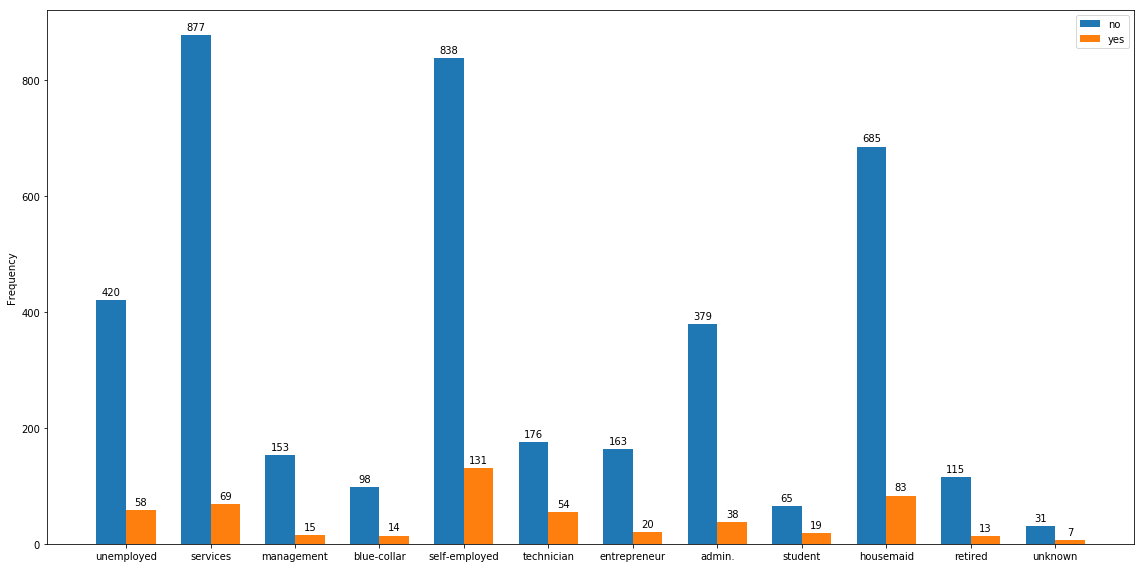

In [12]:
plot_categorical_histogram_with_target(column_name='job', data_frame=categorical_data)

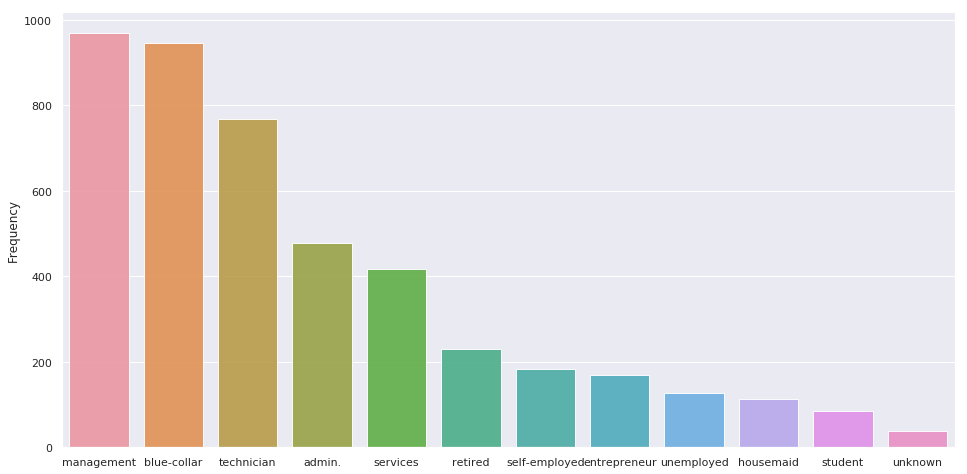

In [14]:
plot_categorical_histogram(column_name='job', data_frame=categorical_data)

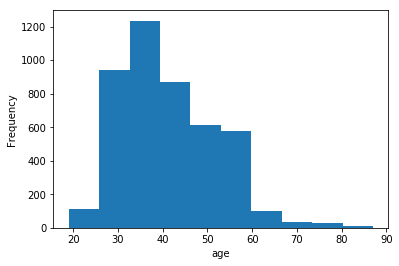

In [13]:
plot_histogram(numerical_data['age'], xlabel="age")


# Input variables:
## bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical:'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate' ,'professional.course', 'university.degree', 'unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

## related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov, 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
